In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./moore.csv', header=None).values
X = df[:,0].reshape(-1, 1)
Y = df[:,1]

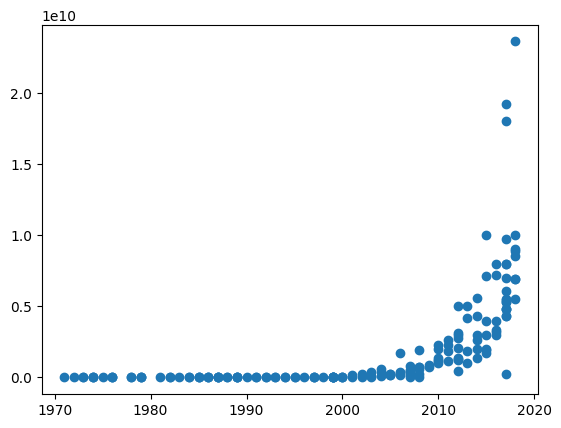

In [5]:
plt.scatter(X, Y)

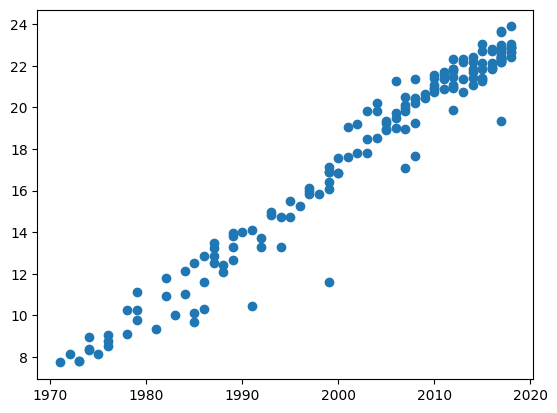

In [6]:
Y = np.log(Y)
plt.scatter(X, Y)

In [7]:
X = X - X.mean()

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss="mse")

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 456.9737 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 662.6126 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 431.4999 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 434.6561 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 436.6207 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 273.6751 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 135.7735 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 70.3422 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 48.0615 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 34.4534 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

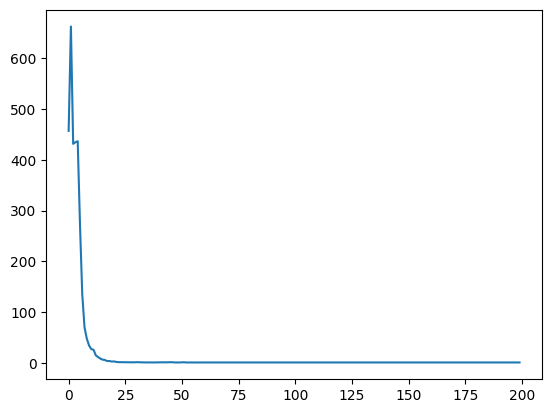

In [9]:
plt.plot(r.history['loss'], label='loss')

In [10]:
print(model.layers)

In [11]:
model.layers[0].get_weights()

[array([[0.33661288]], dtype=float32), array([17.765818], dtype=float32)]

In [12]:
a = model.layers[0].get_weights()[0][0,0]

In [13]:
a

0.33661288

In [14]:
print(f"Time to double: {np.log(2) / a}")

Time to double: 2.0591819899655546


In [15]:
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean() * X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print(f"Time to double: { np.log(2) / a}")

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


6/6 [==============================] - 0s 1ms/step


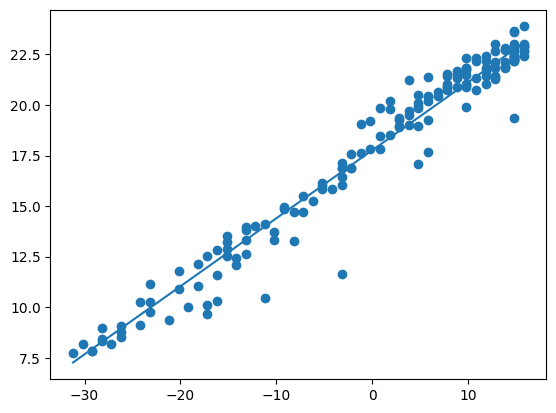

In [16]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [17]:
# Manual calculation

w, b = model.layers[0].get_weights()

X = X.reshape(-1, 1)

Yhat2 = (X.dot(w) + b).flatten()

np.allclose(Yhat, Yhat2)

True